 #                                      ROSSMANN SALES

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

Id - an Id that represents a (Store, Date) duple within the test set

Store - a unique Id for each store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open

StateHoliday - indicates a state holiday
.
SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

StoreType - differentiates between 4 different store models: a, b, c, d

Assortment - describes an assortment level: a = basic, b = extra, c = extended

CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started.

 Sales is our target variable

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
store=pd.read_csv("store.csv")
print(train.shape)
print("\n")
print(test.shape)
print("\n")
print(store.shape)

(1017209, 9)


(41088, 8)


(1115, 10)


In [3]:
print(train.columns)
print("\n")
print(test.columns)
print("\n")
print(store.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')


Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')


Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [4]:
train.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [5]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [6]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [49]:
print("\ntrain")
print(train.isnull().sum())
print("\ntest")
print(test.isnull().sum())
print("\nstore")
print(store.isnull().sum())



train
Store               0
DayOfWeek           0
Date                0
Sales               0
Customers           0
Open                0
Promo               0
SchoolHoliday       0
StateHoliday_cat    0
dtype: int64

test
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

store
Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


In [8]:
store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [9]:
train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [10]:
test.dtypes

Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

## train dataset

In [11]:
train.DayOfWeek.value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

In [12]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Sales variable

In [13]:
opened_sales = (train[(train.Open == 1) & (train.Sales)]) #if the stores are opend
opened_sales.Sales.describe()

count    422307.000000
mean       6951.782199
std        3101.768685
min         133.000000
25%        4853.000000
50%        6367.000000
75%        8355.000000
max       41551.000000
Name: Sales, dtype: float64

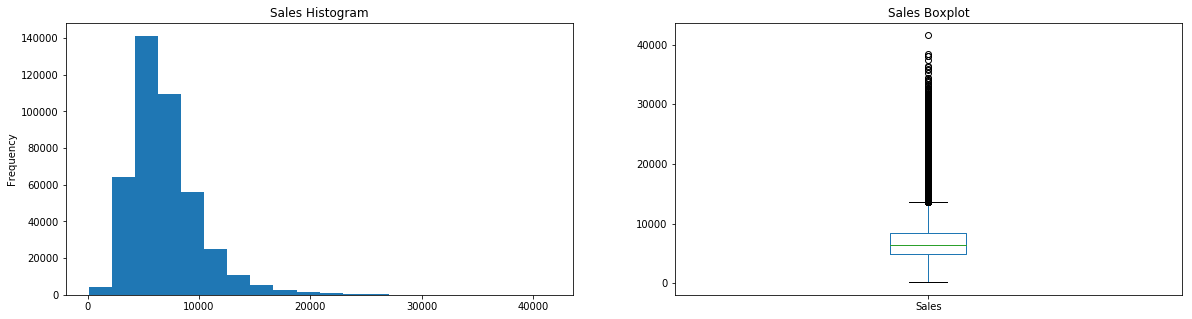

In [14]:
f, ax = plt.subplots(1,2, figsize = (20, 5))

opened_sales.Sales.plot(kind = "hist", title = "Sales Histogram", bins = 20, ax = ax[0])
opened_sales.Sales.plot.box(title = "Sales Boxplot", ax = ax[1])

In [15]:
print("Rossmann has", round(opened_sales.Sales[(opened_sales.Sales > 10000)].count() / opened_sales.shape[0] * 100, 2), 
      "% of the time big sales, over 10,000 Euros")
print("Rossmann has", round(opened_sales.Sales[(opened_sales.Sales < 1000)].count() / opened_sales.shape[0] * 100, 4), 
      "% of the time low sales, under 1000 Euros")

Rossmann has 13.45 % of the time big sales, over 10,000 Euros
Rossmann has 0.0277 % of the time low sales, under 1000 Euros


## customers

In [16]:
train.Customers.describe()

count    1.017209e+06
mean     6.331459e+02
std      4.644117e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.090000e+02
75%      8.370000e+02
max      7.388000e+03
Name: Customers, dtype: float64

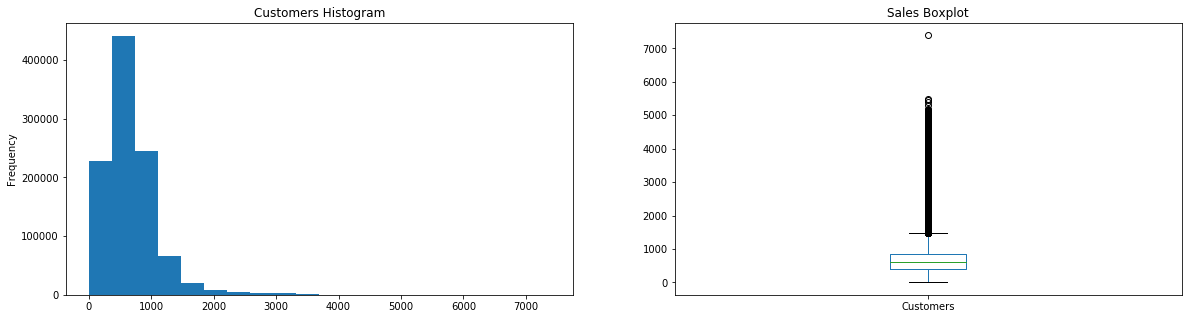

In [17]:
f, ax = plt.subplots(1,2, figsize = (20, 5))

train.Customers.plot(kind = "hist", title = "Customers Histogram", bins = 20, ax = ax[0])
train.Customers.plot.box(title = "Sales Boxplot", ax = ax[1])

In [18]:
#Seems to had a great sortiment on 22th of January 2013. They hit the record of customers. 
train[(train.Customers > 7000)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
993496,817,2,2013-01-22,27190,7388,1,1,0,0


## What about **Promotion**

In [19]:
print(round((train.Promo[train.Promo == 1].count() / train.shape[0] * 100), 2), "% of the time, has been promotions made")

38.15 % of the time, has been promotions made


Now lets take a look at **StateHoliday** Variable.

In [20]:
# StateHoliday is not a continous number. 
train.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [21]:
# StateHoliday is a string and I for me is not so important to know what kind of holiday (a, b or c). I will convert it into 0 and 1, by creating a new variable
train["StateHoliday_cat"] = train["StateHoliday"].map({0:0, "0": 0, "a": 1, "b": 1, "c": 1})
train.StateHoliday_cat.count()

1017209

In [22]:
# let get rid of the StateHoliday column and use only the new one
train = train.drop("StateHoliday", axis = 1)
train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_cat
1017204,1111,2,2013-01-01,0,0,0,0,1,1
1017205,1112,2,2013-01-01,0,0,0,0,1,1
1017206,1113,2,2013-01-01,0,0,0,0,1,1
1017207,1114,2,2013-01-01,0,0,0,0,1,1
1017208,1115,2,2013-01-01,0,0,0,0,1,1


In [23]:
#lets delete the times, where the stores were opened with no sales because of days in inventory.
train = train.drop(train[(train.Open == 0) & (train.Sales == 0)].index)
train = train.reset_index(drop = True) # to ge the indexes back to 0, 1, 2,etc.

In [24]:
train.isnull().all() #to check for NaNs

Store               False
DayOfWeek           False
Date                False
Sales               False
Customers           False
Open                False
Promo               False
SchoolHoliday       False
StateHoliday_cat    False
dtype: bool

## Store Analysics

In [25]:
#how may missing data do we have in %:
100- (store.count() / store.shape[0] * 100)

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

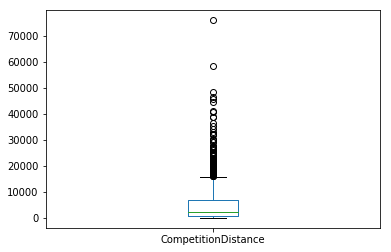

In [26]:
store.CompetitionDistance.plot.box() 

In [27]:
print("the median is", store.CompetitionDistance.median(), "and mean is", store.CompetitionDistance.mean())

the median is 2325.0 and mean is 5404.901079136691


Since we have here some outlier, its better to input the median value to those few missing values

In [28]:
store["CompetitionDistance"].fillna(store["CompetitionDistance"].median(), inplace = True)

### The missing values, are not there, because the stores had no competition. So I would suggest to fill the missing values with zeros

In [29]:

store["CompetitionOpenSinceMonth"].fillna(0, inplace = True)
store["CompetitionOpenSinceYear"].fillna(0, inplace = True)

group by promo2

In [30]:
store.groupby(by = "Promo2", axis = 0).count() 

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Promo2,,,,,,,,,
0,544,544,544,544,544,544,0,0,0
1,571,571,571,571,571,571,571,571,571


### so if no promo has been made, then we should replace the NaN from Promo since Week and Year with zero

In [31]:
store["Promo2SinceWeek"].fillna(0, inplace = True)
store["Promo2SinceYear"].fillna(0, inplace = True)
store["PromoInterval"].fillna(0, inplace = True)

## Merging files stores and train

In [32]:
train_store = pd.merge(train, store, how = "left", on = "Store")
train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 18 columns):
Store                        844392 non-null int64
DayOfWeek                    844392 non-null int64
Date                         844392 non-null object
Sales                        844392 non-null int64
Customers                    844392 non-null int64
Open                         844392 non-null int64
Promo                        844392 non-null int64
SchoolHoliday                844392 non-null int64
StateHoliday_cat             844392 non-null int64
StoreType                    844392 non-null object
Assortment                   844392 non-null object
CompetitionDistance          844392 non-null float64
CompetitionOpenSinceMonth    844392 non-null float64
CompetitionOpenSinceYear     844392 non-null float64
Promo2                       844392 non-null int64
Promo2SinceWeek              844392 non-null float64
Promo2SinceYear              844392 non-null float64
PromoInte

In [33]:
train_store.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
SchoolHoliday                0
StateHoliday_cat             0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [34]:
train_store.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_cat,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.0,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,1.0,0.446352,0.193580,0.001078,5449.868829,4.926491,1369.688401,0.498684,11.596118,1003.230065
std,321.731914,1.723689,3104.214680,401.227674,0.0,0.497114,0.395103,0.032811,7800.946702,4.283663,935.558173,0.499999,15.307873,1005.874806
min,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,1.0,0.000000,0.000000,0.000000,710.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,1.0,0.000000,0.000000,0.000000,2325.000000,4.000000,2006.000000,0.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.0,1.000000,0.000000,0.000000,6880.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.0,1.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [35]:
train_store["Avg_Customer_Sales"] = train_store.Sales / train_store.Customers

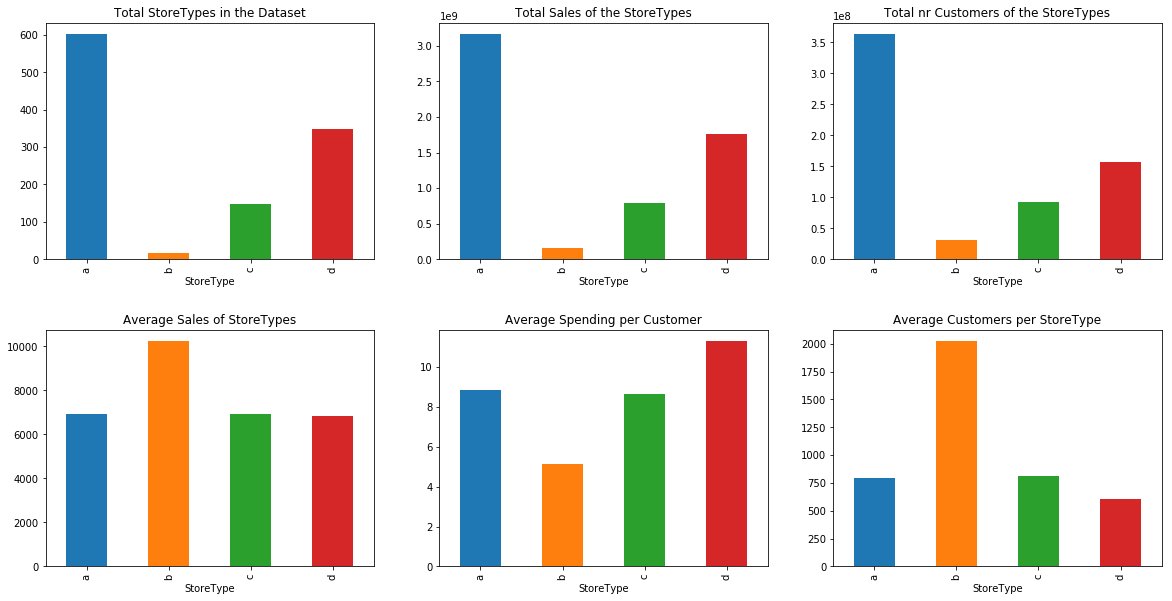

In [36]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

store.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
train_store.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
train_store.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
train_store.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
train_store.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
train_store.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

As we can see from the graphs, the StoreType A has the most stores, sales and customers. 
However the StoreType D has the best averages spendings per customers. StoreType B, with only 17 stores has the most average customers. 

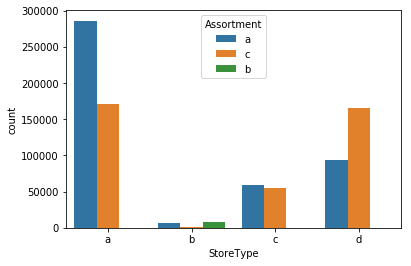

In [37]:
sns.countplot(data = train_store, x = "StoreType", hue = "Assortment", order=["a","b","c","d"]) 
plt.show()

#### So only the StoreType B has all assortments. I think thats why they are performing so good. Maybe this StoreType has more sales area.

#### The assortment C is a good one, because the StoreType D has the best average customer spending.

In [38]:
train_store.Date = train_store.Date.astype("datetime64[ns]")

train_store["Month"] = train_store.Date.dt.month
train_store["Year"] = train_store.Date.dt.year
train_store["Day"] = train_store.Date.dt.day

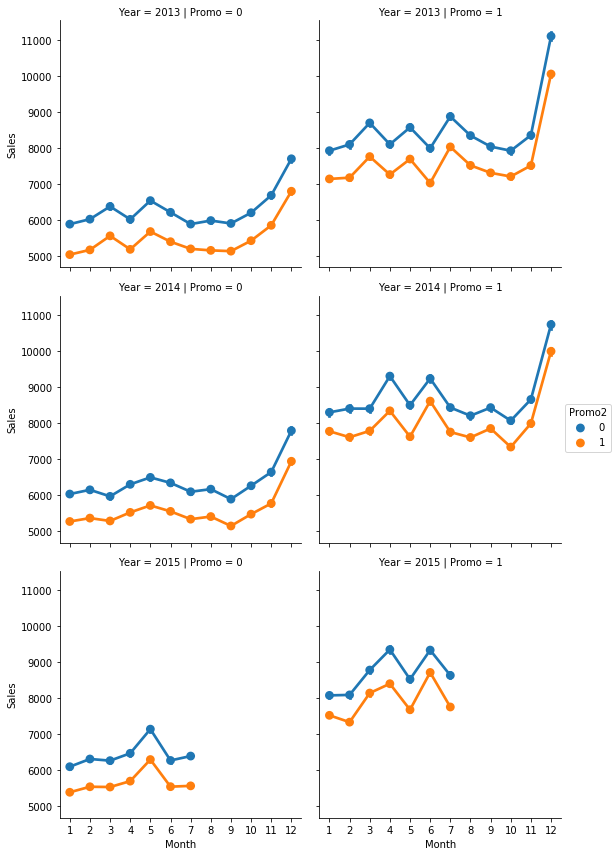

In [39]:
sns.factorplot(data = train_store, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
             )

#### So, of course, if the stores are having promotion the sells are higher.
#### Overall the store promotions sellings are also higher than the seasionality promotions (Promo2). However I can't see no yearly trend. 

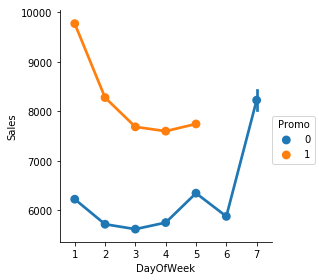

In [40]:
sns.factorplot(data = train_store, x = "DayOfWeek", y = "Sales", hue = "Promo")

In [41]:
print("""So, no promotion in the weekend. However, the sales are very high, if the stores have promotion. 
The Sales are going crazy on Sunday. No wonder.""")
print("There are", train_store[(train_store.Open == 1) & (train_store.DayOfWeek == 7)].Store.unique().shape[0], "stores opend on sundays")    


So, no promotion in the weekend. However, the sales are very high, if the stores have promotion. 
The Sales are going crazy on Sunday. No wonder.
There are 33 stores opend on sundays


### competition distance

In [42]:
train_store.CompetitionDistance.describe()
# The obsverations are continous numbers, so we need to convert them into a categories. Lets a create a new variable.
train_store["CompetitionDistance_Cat"] = pd.cut(train_store["CompetitionDistance"], 5)

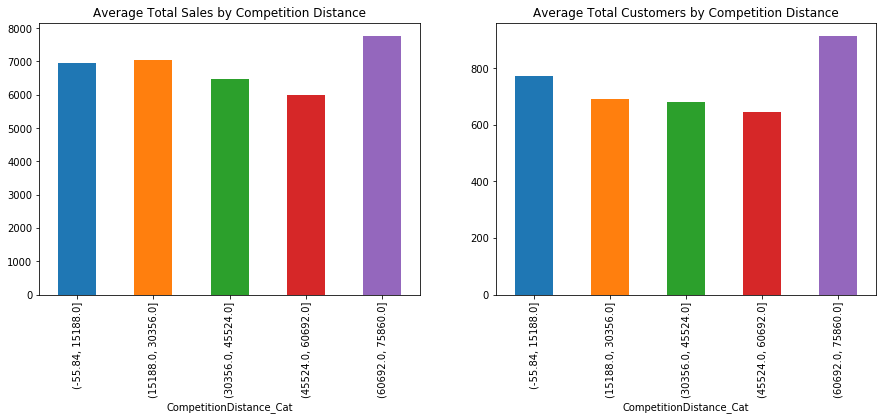

In [43]:
f, ax = plt.subplots(1,2, figsize = (15,5))

train_store.groupby(by = "CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
train_store.groupby(by = "CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])

#### It is pretty clear. If the competions is very far away, the stores are performing better (sales and customers)

In [44]:
# first we have to convert the variables to categories,

train_store["StoreType"] = train_store["StoreType"].astype("category")
train_store["Assortment"] = train_store["Assortment"].astype("category")
train_store["PromoInterval"] = train_store["PromoInterval"].astype("category")

train_store["StoreType_cat"] = train_store["StoreType"].cat.codes
train_store["Assortment_cat"] = train_store["Assortment"].cat.codes
train_store["PromoInterval_cat"] = train_store["Assortment"].cat.codes

train_store["StateHoliday_cat"] = train_store["StateHoliday_cat"].astype("float")
train_store["StoreType_cat"] = train_store["StoreType_cat"].astype("float")
train_store["Assortment_cat"] = train_store["Assortment_cat"].astype("float")
train_store["PromoInterval_cat"] = train_store["PromoInterval_cat"].astype("float")

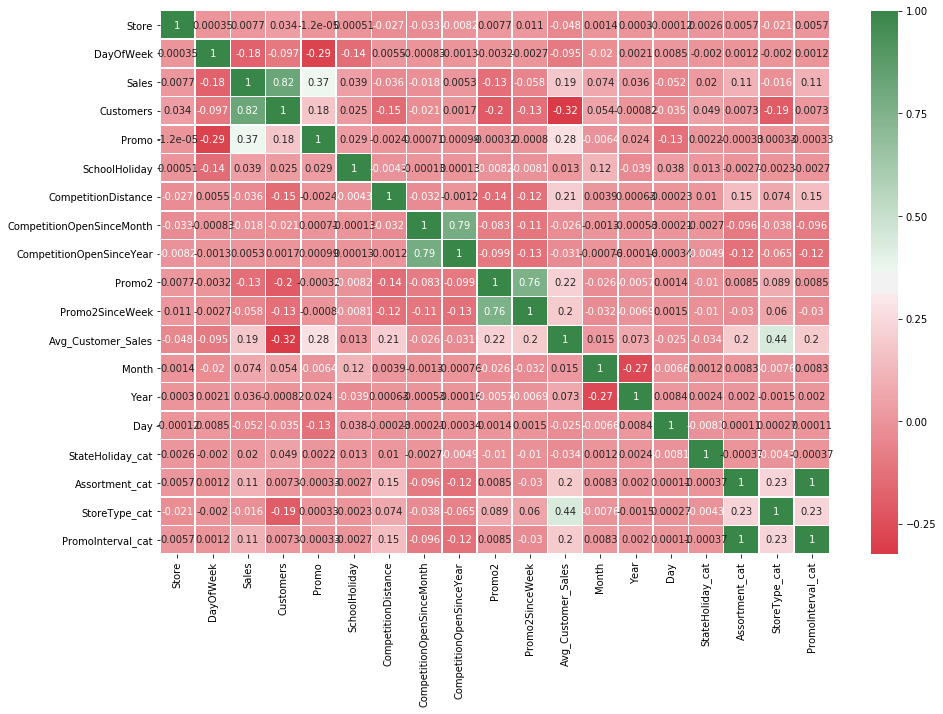

In [45]:
df_correlation = train_store[["Store", "DayOfWeek", "Sales", "Customers", "Promo", "SchoolHoliday", "CompetitionDistance", 
                                 "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2", "Promo2SinceWeek", "Avg_Customer_Sales", 
                                 "Month", "Year", "Day", "StateHoliday_cat", "Assortment_cat", "StoreType_cat", "PromoInterval_cat"]]


f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(df_correlation.corr(),ax = ax, annot=True, cmap=sns.diverging_palette(10, 133, as_cmap=True), linewidths=0.5)

Following correlations we can confirm from the graph above: 
* Customer vs Sales (0.82) 
* Promo vs Sales (0,82)
* Avg_Customer_Sales vs Promo (0,28)
* Avg_Customer_Sales vs Promo2 (0,22)
* StoreTypve vs Avg_Customer_Sales (0,44)

# My conclusion of the analysis: 


* StoreType A has the most sells and customers.
* StoreType B has the lowest Average Sales per Customer. So i think customers visit this type only for small things.
* StoreTybe D had the highest buyer cart. 
* Promo runs only in weekdays.
* Promo2 doesnt seems to be correlated to any significant change in the sales amount.
* Customers tends to buy more on Monday, when there's promotion running (Promo) and on Sundays, when there is no promotion at all. 
* At this point, I dont see any yearly trends. Only seasonal patterns. 


# Random Forest Regression

In [46]:
train_store["CompetitionOpenSince"] = np.where((train_store["CompetitionOpenSinceMonth"] == 0) & (train_store["CompetitionOpenSinceYear"] == 0), 
                                                0,(train_store.Month - train_store.CompetitionOpenSinceMonth) + (12 *(train_store.Year - train_store.CompetitionOpenSinceYear)))

# lets drop the variables
train_store = train_store.drop(["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"], axis = 1)

In [47]:
# lets drop few variables, that either or not numeric or we dont need them anymore
# lets create a new data frame for this model
ts_rfr = train_store.copy()
ts_rfr = train_store.drop(["Date","StoreType", "Assortment", "PromoInterval", "CompetitionDistance_Cat"], axis = 1) #dop this columns, as we already have them in categories


In [67]:
from sklearn import model_selection
from sklearn import metrics

features = ts_rfr.drop(["Customers", "Sales", "Avg_Customer_Sales"], axis = 1)
target = ts_rfr["Sales"]

X_train, X_train_test, y_train, y_train_test = model_selection.train_test_split(features, target, test_size = 0.20, random_state = 15) 

print(X_train.shape, X_train_test.shape, y_train.shape, y_train_test.shape)

(675513, 17) (168879, 17) (675513,) (168879,)


In [51]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X_train, y_train)
yhat = rfr.predict(X_train_test)

In [52]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [53]:
rms_rfr = sqrt(mean_squared_error(y_train_test, yhat))
print("RMS:", rms_rfr) 

RMS: 983.5120948904977


In [ ]:
# XGBoost

In [54]:
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

In [68]:
import xgboost as xgb

param = {'max_depth':10, 
         "booster": "gbtree",   
         'eta':1, 
         'silent':1, 
         'objective':'reg:linear'
        }

num_round = 100 #how many boosting rounds

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_train_test, y_train_test)
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

xgboost = xgb.train(param, dtrain, num_round, evals=watchlist, \
  early_stopping_rounds= 100, feval=rmspe_xg, verbose_eval=True)
         
# make prediction
preds = xgboost.predict(dtest)

# model = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
#   early_stopping_rounds= 100, feval=rmspe_xg, verbose_eval=True)

[0]	train-rmse:2274.79	eval-rmse:2280.63	train-rmspe:nan	eval-rmspe:nan
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:2150.56	eval-rmse:2172.12	train-rmspe:nan	eval-rmspe:nan
[2]	train-rmse:1908.5	eval-rmse:1936.47	train-rmspe:nan	eval-rmspe:nan
[3]	train-rmse:1790.51	eval-rmse:1818.59	train-rmspe:nan	eval-rmspe:nan
[4]	train-rmse:1684.42	eval-rmse:1714.7	train-rmspe:nan	eval-rmspe:nan
[5]	train-rmse:1444.02	eval-rmse:1478.75	train-rmspe:nan	eval-rmspe:nan
[6]	train-rmse:1334.71	eval-rmse:1370.92	train-rmspe:nan	eval-rmspe:nan
[7]	train-rmse:1269.45	eval-rmse:1309.72	train-rmspe:nan	eval-rmspe:nan
[8]	train-rmse:1225.19	eval-rmse:1271.76	train-rmspe:nan	eval-rmspe:nan
[9]	train-rmse:1173.67	eval-rmse:1221.34	train-rmspe:nan	eval-rmspe:nan
[10]	train-rmse:1085.94	eval-rmse:1136.87	train-rmspe:nan	eval-rmspe:nan
[11]	train-rmse:1026.89	eval-rmse:1082.01	train-rmspe:nan	eval-

In [56]:
rms_xgboost = sqrt(mean_squared_error(y_train_test, preds))
print("RMS:", rms_xgboost) 

RMS: 841.9207317999857


In [60]:
print("now lets see the scores togher")

model_errors = pd.DataFrame({
    "Model": [ "Random Forest Regression", "XGBoost"],
    "Score": [ rms_rfr, rms_xgboost]
})

model_errors.sort_values(by = "Score", ascending = True)

now lets see the scores togher


,Model,Score
1,XGBoost,841.920732
0,Random Forest Regression,983.512095
